In [0]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip

--2019-07-20 08:47:12--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.104.88
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.104.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘P16-Recurrent-Neural-Networks.zip’

P16-Recurrent-Neura 100%[===================>]  23.67K  --.-KB/s    in 0.02s   

2019-07-20 08:47:12 (1.01 MB/s) - ‘P16-Recurrent-Neural-Networks.zip’ saved [24237/24237]



In [0]:
!unzip '/content/P16-Recurrent-Neural-Networks.zip'

Archive:  /content/P16-Recurrent-Neural-Networks.zip
replace Recurrent_Neural_Networks/Google_Stock_Price_Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Test.csv  
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Train.csv  
  inflating: Recurrent_Neural_Networks/rnn.py  


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the training set
dataset_train = pd.read_csv('/content/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
training_set.shape

(1258, 1)

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)#converting value in btw 0,1

In [0]:
training_set_scaled.shape

(1258, 1)

In [0]:
training_set_scaled[0:60]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)#can give list as i/p to any model

In [0]:
training_set_scaled[60,0]

0.08627874097775134

In [0]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [0]:
y_train.shape

(1198,)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#return sequencee true if more lstm units(like dense layers) are there 
regressor.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
regressor.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                20200     
__________

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0720 08:48:43.748169 140495489087360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 08:48:46.451857 140495489087360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0576
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)#-1 can give any number of rows but only 1 column
inputs = sc.transform(inputs)

In [0]:
len(dataset_total)

1278

In [0]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [0]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
      

In [0]:
X_test.shape

(20, 60, 1)

In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [0]:
predicted_stock_price

array([[0.92951894],
       [0.9249307 ],
       [0.9236782 ],
       [0.9251117 ],
       [0.9302628 ],
       [0.94002813],
       [0.9507045 ],
       [0.95742935],
       [0.959954  ],
       [0.9597958 ],
       [0.9585801 ],
       [0.9571983 ],
       [0.95620346],
       [0.9565245 ],
       [0.95800406],
       [0.964647  ],
       [0.9760585 ],
       [0.98991185],
       [1.0001523 ],
       [0.99817026]], dtype=float32)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [0]:
predicted_stock_price

array([[778.7922 ],
       [776.32574],
       [775.65247],
       [776.42303],
       [779.1921 ],
       [784.4415 ],
       [790.1807 ],
       [793.7957 ],
       [795.15283],
       [795.0678 ],
       [794.4143 ],
       [793.6715 ],
       [793.1367 ],
       [793.30927],
       [794.1047 ],
       [797.67566],
       [803.81   ],
       [811.257  ],
       [816.7619 ],
       [815.69635]], dtype=float32)

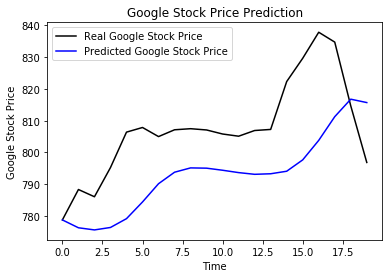

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'black', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
